# Demo Gaussian process

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
%matplotlib inline  
print ("Packages Loaded")

Packages Loaded


#### Define a kernel function

In [2]:
def kernel_se(_X1,_X2,_hyp={'gain':1,'len':1,'s2w':1e-8},_use_s2w=False):
    hyp_gain = float(_hyp['gain'])**2
    hyp_len  = 1/float(_hyp['len'])
    if len(_X1.shape)<=1: _X1=_X1.reshape((-1,1))
    if len(_X2.shape)<=1: _X2=_X2.reshape((-1,1))
    pairwise_dists = cdist(_X1,_X2,'euclidean')
    K = hyp_gain*np.exp(-pairwise_dists ** 2/(hyp_len**2))
    if _use_s2w:
        K = K + _hyp['s2w']*np.eye(_X1.shape[0])
    return K
print ("Kernel function defined.")

Kernel function defined.


#### Define a training data

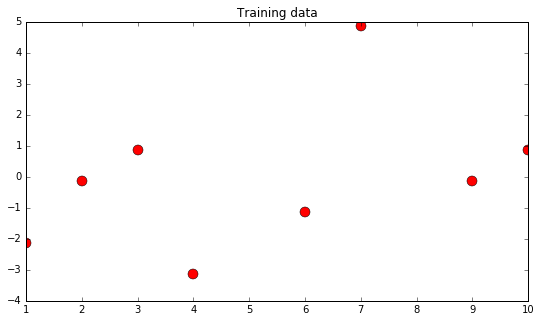

In [3]:
xTr = np.array([[1, 2, 3, 4, 6, 7, 9, 10]]).T
yTr = np.array([[2, 4, 5, 1, 3, 9, 4, 5]]).T
yTr = yTr - yTr.mean()
# Plot
plt.figure(1, figsize=(9,5))
plt.plot(xTr[:,0],yTr[:,0],'ro',ms=10,label='Original data')
plt.title('Training data')

#### Gaussian process regression

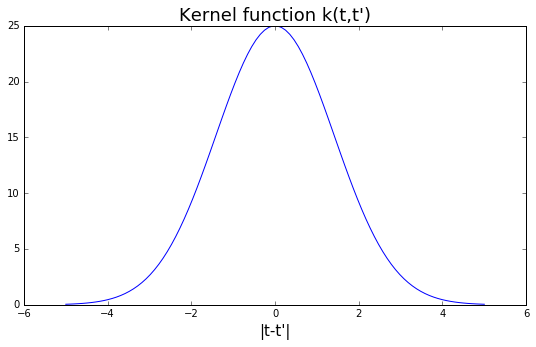

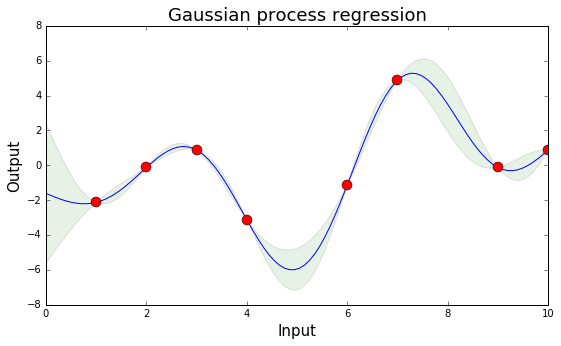

In [37]:
# Kernel hyperparameters
hyp={'gain':5,'len':1./2.,'s2w':1e-8}

# Test inputs
nTe = 100
xTe = np.array([np.linspace(0,10,nTe)]).T

# Gaussian process regression
K_TrTr = kernel_se(xTr,xTr,_hyp=hyp,_use_s2w=True)
K_TeTr = kernel_se(xTe,xTr,_hyp=hyp)
K_TeTe = kernel_se(xTe,xTe,_hyp=hyp)
alpha = np.matmul(np.linalg.inv(K_TrTr), yTr)
yTe = np.matmul(K_TeTr, alpha)
varTe = K_TeTe - np.matmul(np.matmul(K_TeTr,np.linalg.inv(K_TrTr)),K_TeTr.T)
varTe = np.diag(varTe).reshape((-1,1))
varTe = np.sqrt(varTe)

# Plot
plt.figure(1, figsize=(9,5))
a = np.linspace(-5,5,nTe).reshape((-1,1))
b = kernel_se(np.zeros(1),a,_hyp=hyp).reshape((-1,1))
plt.plot(a,b)
plt.title("Kernel function k(t,t')",fontsize=18)
plt.xlabel("|t-t'|",fontsize=15)

plt.figure(2, figsize=(9,5))
plt.fill_between(xTe.squeeze(),(yTe-2.0*varTe).squeeze(),(yTe+2.0*varTe).squeeze(),
            facecolor='g', interpolate=True, alpha=0.1)
plt.plot(xTe,yTe)
plt.plot(xTr[:,0],yTr[:,0],'ro',ms=10,label='Original data')
plt.title('Gaussian process regression',fontsize=18)
plt.xlabel('Input',fontsize=15)
plt.ylabel('Output',fontsize=15)